## 0. 라이브러리 import 및 폰트 세팅

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family = "NanumGothic")

## 
## 1. 전처리 - 데이터 불러오기 및 편집 

### 1) 서울시 자치구별 범죄 건수

In [2]:
# 2018 범죄 데이터 불러오기
rd_crime = pd.read_csv('../datas/eda/2018년_5대범죄.txt', header=1, sep='\t', thousands=',')


# 열이름 수정
col = ['기간', '자치구', '합계', '_', '살인', '_', '강도', '_', '강간강제추행', '_', '절도', '_', '폭력', '_']
rd_crime.columns = col
rd_crime = rd_crime[["기간", "자치구", "합계", '살인', '강도', '강간강제추행', '절도', '폭력']]


# 합계 행 삭제
rd_crime = rd_crime[1::]
rd_crime.tail(2)

,기간,자치구,합계,살인,강도,강간강제추행,절도,폭력
24,2018,송파구,5807,5,6,309,2352,3135
25,2018,강동구,3919,3,7,170,1515,2224


### 2) 서울시 자치구별 주민등록인구

In [3]:
# 2018 주민등록인구 데이터 불러오기
rd_pop = pd.read_csv('../datas/eda/2018년_주민등록인구.txt', sep='\t', header=2, thousands=',')


# 열이름 수정
col_pop = ['기간', '자치구', '세대', '총계_등록인구', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']
rd_pop.columns = col_pop
rd_pop = rd_pop[['기간', '자치구', '총계_등록인구']]


# 합계 행 삭제
rd_pop = rd_pop[1::]
rd_pop["기간"] = 2018
rd_pop.tail(2)

,기간,자치구,총계_등록인구
24,2018,송파구,673507
25,2018,강동구,431920


### 3) 서울시 자치구별 유동인구

In [4]:
# 2018 유동인구 데이터 불러오기
rd_float_pop = pd.read_csv('../datas/eda/2018년_유동인구.csv', thousands=',')


# 사전에 전처리 완료한 파일을 불러왔기 때문에 특별한 추가 전처리는 진행하지 않음

## 
## 2. 전처리 - 데이터프레임 merge, 열 추가, 정규화

### 1) Merge

In [5]:
# 범죄건수, 주민등록인구 merge
crime_pop = pd.merge(rd_crime, rd_pop, on = ["자치구", "기간"])

    
# 범죄건수, 유동인구 merge
crime_float_pop = pd.merge(rd_crime, rd_float_pop, on=["자치구", "기간"])

### 2) 열 추가

In [6]:
#'유동인구 1000명당~' 열 추가
crime_float_pop["합계_유동1000명"] = crime_float_pop["합계"] / crime_float_pop["유동인구"] * 1000
crime_float_pop["살인_유동1000명"] = crime_float_pop["살인"] / crime_float_pop["유동인구"] * 1000
crime_float_pop["강도_유동1000명"] = crime_float_pop["강도"] / crime_float_pop["유동인구"] * 1000
crime_float_pop["강간강제추행_유동1000명"] = crime_float_pop["강간강제추행"] / crime_float_pop["유동인구"] * 1000
crime_float_pop["절도_유동1000명"] = crime_float_pop["절도"] / crime_float_pop["유동인구"] * 1000
crime_float_pop["폭력_유동1000명"] = crime_float_pop["폭력"] / crime_float_pop["유동인구"] * 1000

### 3) 정규화

In [7]:
# 범죄건수~주민등록인구 merge 데이터프레임 정규화
crime_pop_norm = crime_pop.copy()
col = ['합계', '살인', '강도', '강간강제추행', '절도', '폭력', '총계_등록인구']

for each in col:
    crime_pop_norm[each] = crime_pop_norm[each] / crime_pop_norm[each].max()


# 범죄건수~유동인구 merge 데이터프레임 정규화
crime_float_pop_norm = crime_float_pop[['기간', '자치구', '합계', '살인', '강도', '강간강제추행', '절도', '폭력', '유동인구']]

for each in crime_float_pop_norm.columns[2:]:
    crime_float_pop_norm[each] = crime_float_pop_norm[each] / crime_float_pop_norm[each].max()
    
crime_float_pop_norm.set_index('자치구', inplace=True)

# 범죄율 데이터프레임 정규화
crime_rate_float_pop_norm = crime_float_pop[['기간','자치구', '합계_유동1000명', '살인_유동1000명', '강도_유동1000명',
                                             '강간강제추행_유동1000명', '절도_유동1000명', '폭력_유동1000명']]

for each in crime_rate_float_pop_norm.columns[2:]:
    crime_rate_float_pop_norm[each] = crime_rate_float_pop_norm[each] / crime_rate_float_pop_norm[each].max()

crime_rate_float_pop_norm.set_index('자치구', inplace=True)
crime_rate_float_pop_norm.head()

<ipython-input-7-bbebf7387c06>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_float_pop_norm[each] = crime_float_pop_norm[each] / crime_float_pop_norm[each].max()
<ipython-input-7-bbebf7387c06>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_rate_float_pop_norm[each] = crime_rate_float_pop_norm[each] / crime_rate_float_pop_norm[each].max()


,기간,합계_유동1000명,살인_유동1000명,강도_유동1000명,강간강제추행_유동1000명,절도_유동1000명,폭력_유동1000명
자치구,,,,,,,
종로구,2018,0.537411,0.375423,0.214527,0.584307,0.642369,0.462821
중구,2018,0.515001,0.109805,0.690203,0.449699,0.705034,0.404654
용산구,2018,0.429580,0.054107,0.185509,0.708663,0.410522,0.403889
성동구,2018,0.368119,0.128737,0.367820,0.320925,0.445157,0.321539
광진구,2018,0.600365,0.461181,0.150590,0.596992,0.806818,0.473911


## 
## 3. 분석 및 시각화

### 1) 상관계수 도출

In [8]:
# 범죄건수 ~ 주민등록인구 상관계수
tmp = []
for each in col[:len(col)-1]:
    tmp.append({
        "type": each,
        "corr_regis_pop": np.corrcoef(crime_pop_norm["총계_등록인구"], crime_pop_norm[each])[0][1]
    })

crime_pop_corr_df = pd.DataFrame(tmp)


# 범죄건수 ~ 유동인구 상관계수
tmp = []
for each in col[:len(col)-1]:
    tmp.append({
        "type": each,
        "corr_float_pop": np.corrcoef(crime_float_pop_norm["유동인구"], crime_float_pop_norm[each])[0][1]
    })
crime_float_pop_corr_df = pd.DataFrame(tmp)


# 주민등록인구와 유동인구 각각의 범죄건수와의 상관계수 비교
pd.merge(crime_pop_corr_df, crime_float_pop_corr_df, on="type")

,type,corr_regis_pop,corr_float_pop
0,합계,0.507629,0.788815
1,살인,0.351814,0.332246
2,강도,0.102189,0.434078
3,강간강제추행,0.270886,0.835629
4,절도,0.441084,0.797459
5,폭력,0.566965,0.702143


```
**************************************************************************************************** 
살인만 근소하게 작은 값을 보이고, 나머지는 유동인구가 훨씬 범죄건수의 분포와 높은 상관성을 보인다!
-> 따라서 구별 '범죄율'은 '유동인구'에 대해서 계산하도록 하겠다!
****************************************************************************************************
```

### 2) 시각화

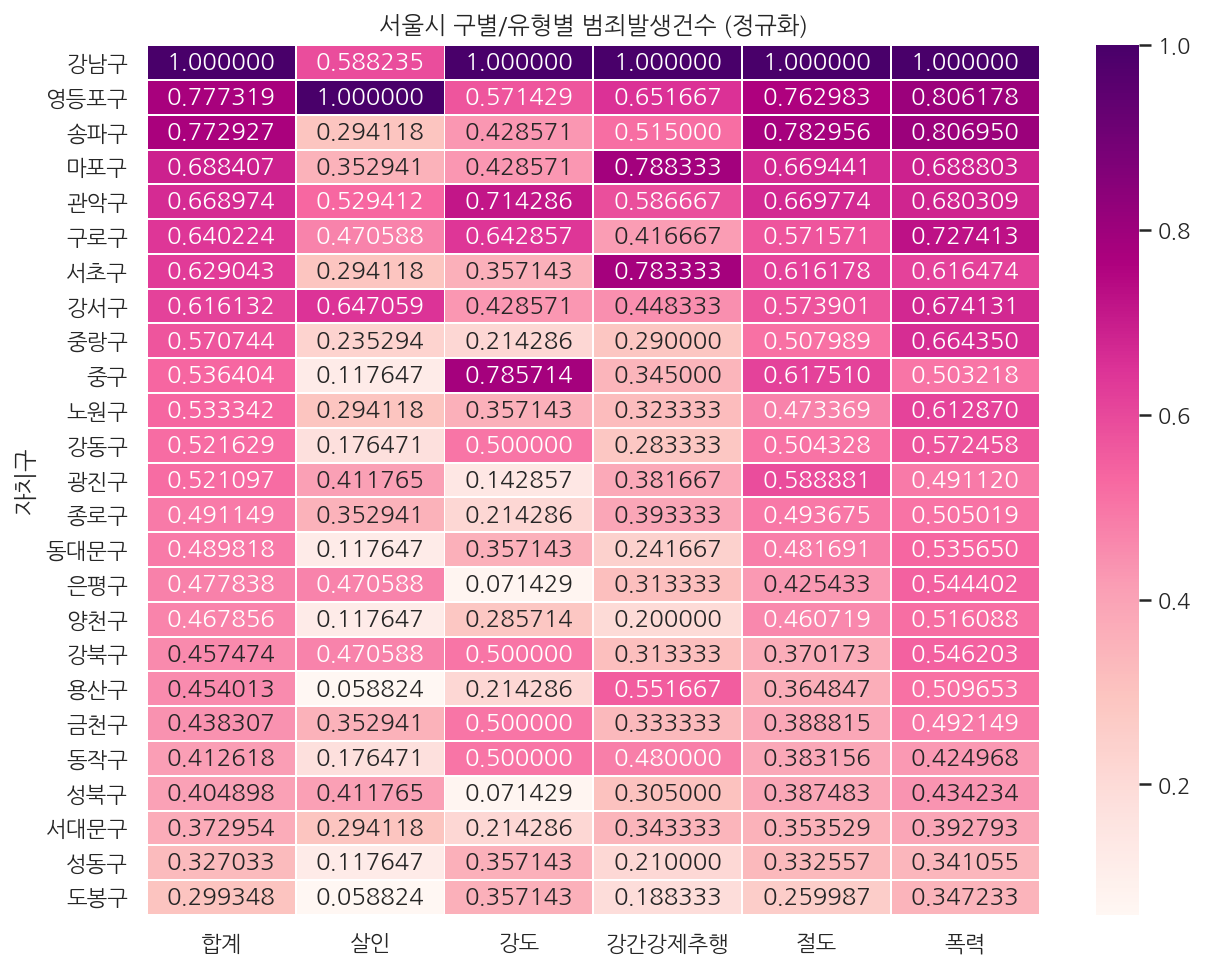

In [9]:
# 구별/종류별 범죄발생건수 시각화
target_col = ['합계', '살인', '강도', '강간강제추행', '절도', '폭력']

plt.figure(figsize=(10,8))
sns.heatmap(crime_float_pop_norm[target_col].sort_values(by='합계', ascending=False),
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title("서울시 구별/유형별 범죄발생건수 (정규화)")
plt.show()

```
*****************************************************************************************
↳ 범죄발생건수 기준으로 보았을 때, 강남 3구는 상위권에 속하고 위험하다고 보일 수 있다
*****************************************************************************************
```

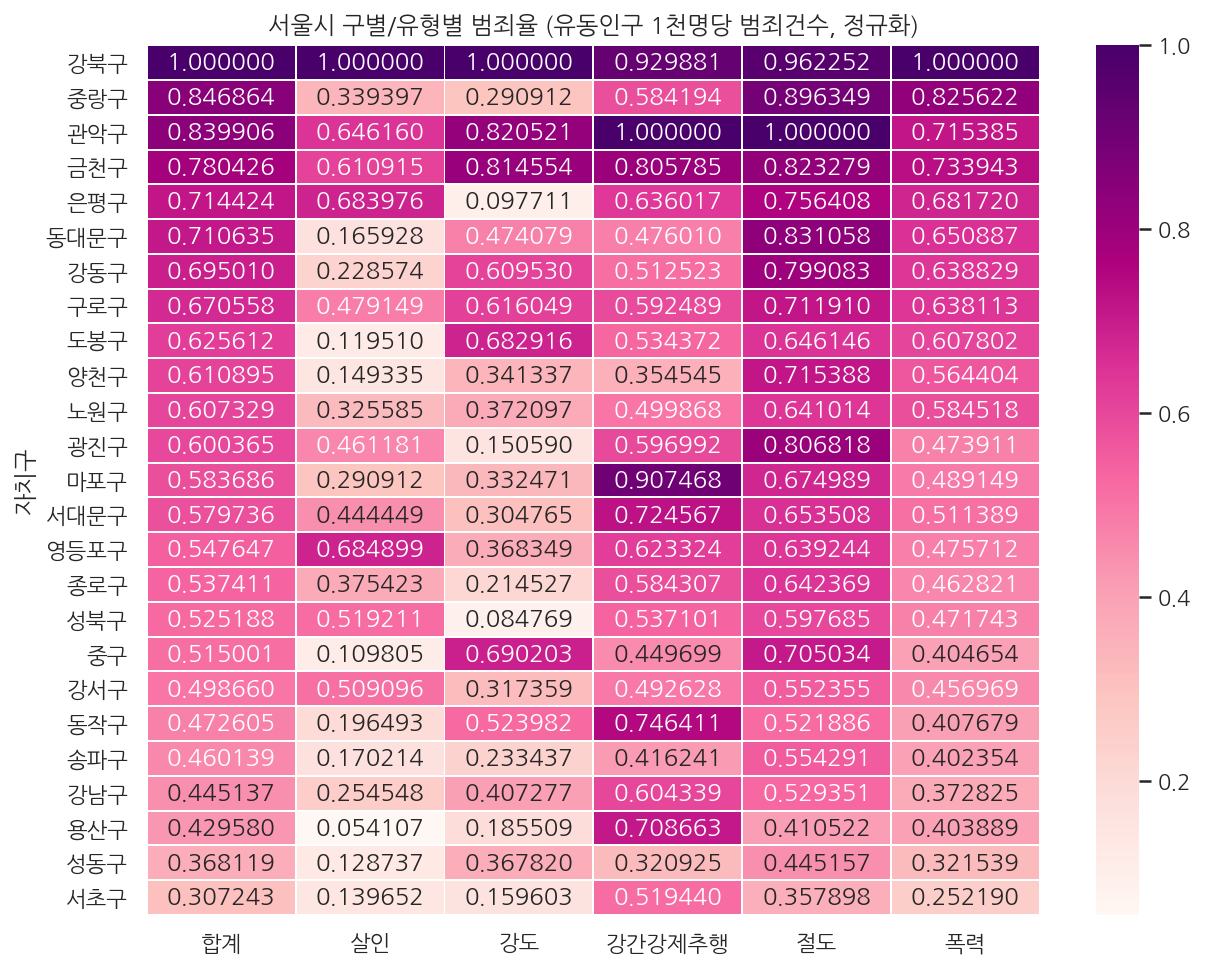

In [10]:
# 구별/종류별 범죄율 시각화
crime_rate_float_pop_norm.columns = ['기간', '합계', '살인', '강도', '강간강제추행', '절도', '폭력']
target_col = ['합계', '살인', '강도', '강간강제추행', '절도', '폭력']

plt.figure(figsize=(10,8))
sns.heatmap(crime_rate_float_pop_norm[target_col].sort_values(by='합계', ascending=False),
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title("서울시 구별/유형별 범죄율 (유동인구 1천명당 범죄건수, 정규화)")
plt.show()

```
*********************************************************************************************************
↳ 그러나 범죄발생률 기준으로 보았을 때, 강남 3구는 하위권에 속하므로 위험하지 않은 편이라고 볼 수 있다
*********************************************************************************************************
```